Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score

Data collecting & processing


In [ ]:
#loading the data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()


In [ ]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
#loading the dataset as data frame
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [ ]:
print(data_frame)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [ ]:
#first 5 rows of the data frame
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# adding the 'target' column to the data frame
data_frame['label'] = breast_cancer_dataset.target

In [ ]:
#print the first five rows of the dataset
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
#print the last five rows of the dataset
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [ ]:
#number of the rows and column have in the dataset
data_frame.shape

(569, 31)

In [ ]:
# Checking any rows are duplicated or not
print(data_frame.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool


In [ ]:
# getting info about the dataset
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
#check if there any missing values have or not
data_frame.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


<Axes: >

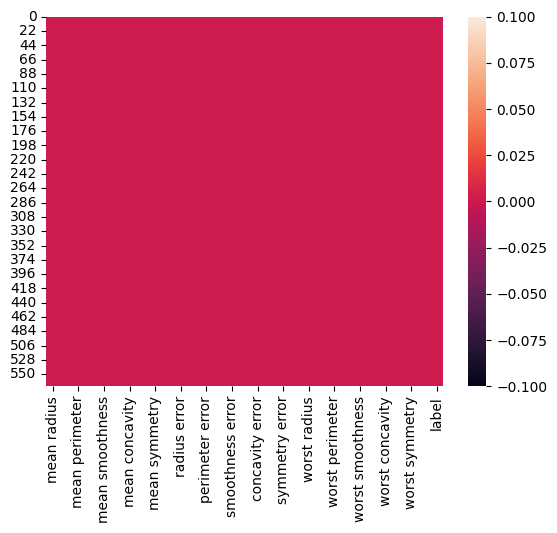

In [ ]:
sns.heatmap(data_frame.isnull(), cbar=True)

In [ ]:
#statistical measures of the data
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


<Axes: >

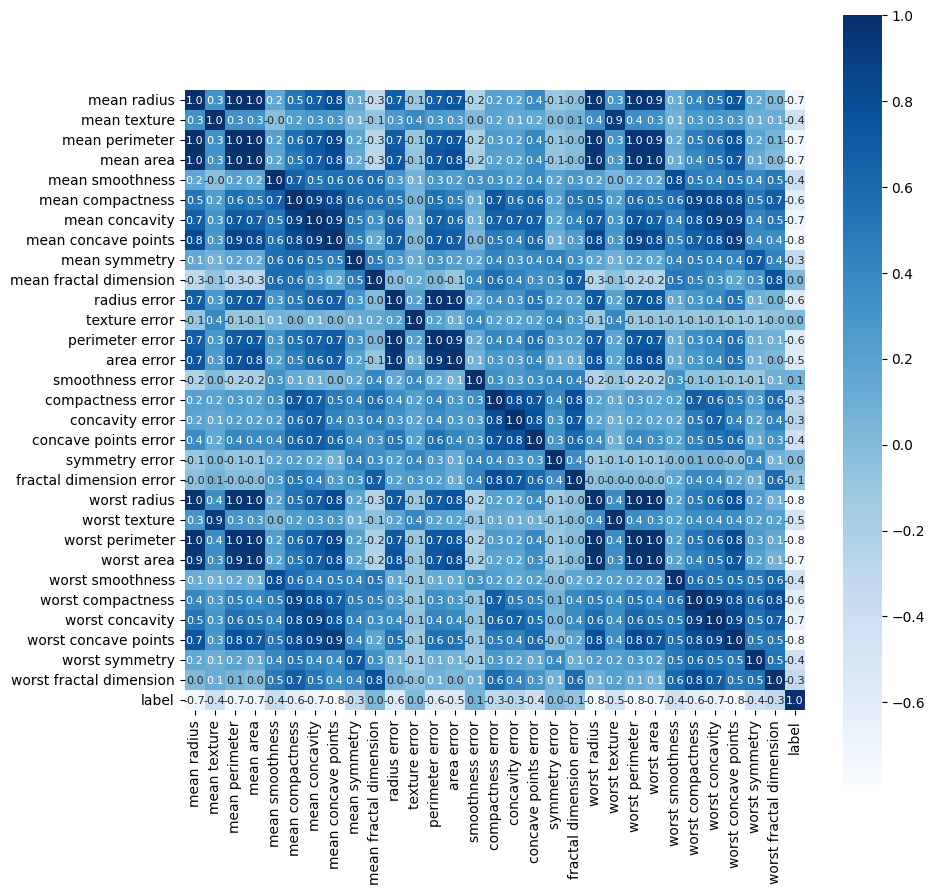

In [ ]:
#constructing a Heat Map
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(data_frame.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
#checking the distribution of the target value
data_frame['label'].value_counts()

,count
label,
1,357
0,212


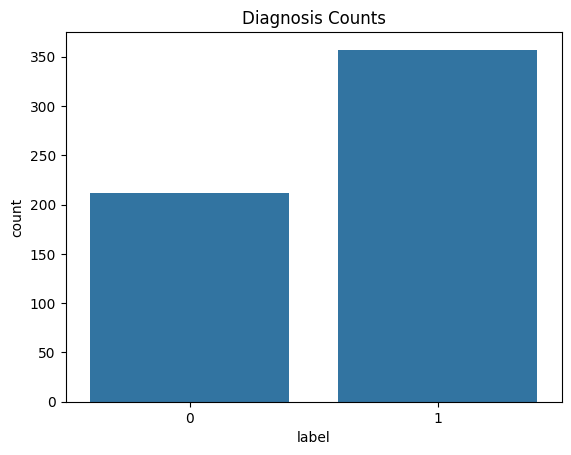

In [ ]:
sns.countplot(x='label', data=data_frame)
plt.title('Diagnosis Counts')
plt.show()

In [ ]:
data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


0- malignant
1- benign

Splitting the feature and target

In [ ]:
X = data_frame.drop(columns='label', axis=1) #for dropping column axis=1, but for dropping axis=0
Y = data_frame['label']

In [ ]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [ ]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


In [ ]:
#Splitting the data into training data and test data
X_train, X_test, Y_train, Y_test =train_test_split(X,Y, test_size = 0.3, stratify = Y, random_state = 2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (398, 30) (171, 30)


Model comparison

In [ ]:
Models = {
    "Logistic Regression" : LogisticRegression(),
    "Support Vector Machine" : SVC(),
    "K-Nearest Neighbors" : KNeighborsClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "AdaBoost" : AdaBoostClassifier(),
    "Gradient Boosting" : GradientBoostingClassifier(),
    "Decision Tree" : DecisionTreeClassifier()
}

for i in range (len(Models)):
  Model = list(Models.values())[i]
  Model.fit(X_train, Y_train)  # Train the model

  #Make Prediction
  Y_train_pred = Model.predict(X_train)
  Y_test_pred = Model.predict(X_test)

  # Training set performance
  Model_train_accuracy = accuracy_score(Y_train, Y_train_pred)*100
  Model_train_f1 = f1_score(Y_train, Y_train_pred,average = "weighted")*100
  Model_train_precision = precision_score(Y_train, Y_train_pred)*100
  Model_train_recall = recall_score(Y_train, Y_train_pred)*100
  Model_train_roc_auc = roc_auc_score(Y_train, Y_train_pred)*100

  # Test set performance
  Model_test_accuracy = accuracy_score(Y_test, Y_test_pred)*100
  Model_test_f1 = f1_score(Y_test, Y_test_pred,average = "weighted")*100
  Model_test_precision = precision_score(Y_test, Y_test_pred)*100
  Model_test_recall = recall_score(Y_test, Y_test_pred)*100
  Model_test_roc_auc = roc_auc_score(Y_test, Y_test_pred)*100

  print(list(Models.keys())[i])

  print("Model performance for Training set")
  print("--Accuracy:{:.4f}".format(Model_train_accuracy))
  print("--F1 Score:{:.4f}".format(Model_train_f1))
  print("--Precision:{:.4f}".format(Model_train_precision))
  print("--Recall:{:.4f}".format(Model_train_recall))
  print("--Roc Auc Score:{:.4f}".format(Model_train_roc_auc))
  print(".............................................")
  print("Model performance for Test set")
  print("--Accuracy:{:.4f}".format(Model_test_accuracy))
  print("--F1 Score:{:.4f}".format(Model_test_f1))
  print("--Precision:{:.4f}".format(Model_test_precision))
  print("--Recall:{:.4f}".format(Model_test_recall))
  print("--Roc Auc Score:{:.4f}".format(Model_test_roc_auc))
  print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, Y_test_pred)}\n")
  print(f"Classification Report :- \n {classification_report(Y_test, Y_test_pred)}")
  print('='*35)
  print('\n')

Logistic Regression
Model performance for Training set
--Accuracy:94.7236
--F1 Score:94.6875
--Precision:94.2085
--Recall:97.6000
--Roc Auc Score:93.7324
.............................................
Model performance for Test set
--Accuracy:94.7368
--F1 Score:94.7284
--Precision:95.3704
--Recall:96.2617
--Roc Auc Score:94.2246
Confusion Matrix :- 
[[ 59   5]
 [  4 103]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93        64
           1       0.95      0.96      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



Support Vector Machine
Model performance for Training set
--Accuracy:90.7035
--F1 Score:90.4535
--Precision:88.1720
--Recall:98.4000
--Roc Auc Score:88.0514
.............................................
Model performance for Test set
--Accuracy:90.0585
--F1 Score:89.66

We will apply GridsearchCV method for hyperparameter tuning

In [ ]:
# list of models
models_list = [LogisticRegression(), SVC(), KNeighborsClassifier(), RandomForestClassifier(random_state=0), AdaBoostClassifier(), GradientBoostingClassifier(), DecisionTreeClassifier()]

In [ ]:
 #creating a dictionary that contains hyperparameter values for the above mentioned models

model_hyperparameters = {
    'log_reg_hyperparameters': {
        'C' : [1,5,10,20],
        'max_iter' : [1000,5000,10000],
        'penalty':['l1', 'l2', 'elasticnet', None],
        'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
    },
    'svc_hyperparameters': {
        'kernel' : ['linear', 'poly', 'rbf' , 'sigmoid'],
        'C' : [1,5,10,20]
    },
    'KNN_hyperparameters': {
        'n_neighbors' : [3,5,10]
    },
    'random_forest_hyperparameters' : {
        "max_depth" :[5,8,15,None,50,100],
        "max_features" : [5,8,15,None,"auto"],
        "min_samples_split" : [2,8,15,20],
        "n_estimators" : [10, 20,50,100]
    },
    'AdaBoost_hyperparameters' : {
        'n_estimators' : [10, 20,50,100],
        'learning_rate' : [0.001, 0.01, 0.1],
    },
    'GradientBoosting_hyperparameters' : {
        'n_estimators' : [10, 20,50,100],
        'learning_rate' : [0.001, 0.01],
    },
    'DecisionTree_hyperparameters' : {
        'criterion' : ['gini', 'entropy'],
        'splitter' : ['best', 'random']
    }
}


In [ ]:
model_keys = list(model_hyperparameters.keys())
print(model_keys)

['log_reg_hyperparameters', 'svc_hyperparameters', 'KNN_hyperparameters', 'random_forest_hyperparameters', 'AdaBoost_hyperparameters', 'GradientBoosting_hyperparameters', 'DecisionTree_hyperparameters']


In [ ]:
print(model_hyperparameters)

{'log_reg_hyperparameters': {'C': [1, 5, 10, 20], 'max_iter': [1000, 5000, 10000], 'penalty': ['l1', 'l2', 'elasticnet', None], 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}, 'svc_hyperparameters': {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}, 'KNN_hyperparameters': {'n_neighbors': [3, 5, 10]}, 'random_forest_hyperparameters': {'max_depth': [5, 8, 15, None, 50, 100], 'max_features': [5, 8, 15, None, 'auto'], 'min_samples_split': [2, 8, 15, 20], 'n_estimators': [10, 20, 50, 100]}, 'AdaBoost_hyperparameters': {'n_estimators': [10, 20, 50, 100], 'learning_rate': [0.001, 0.01, 0.1]}, 'GradientBoosting_hyperparameters': {'n_estimators': [10, 20, 50, 100], 'learning_rate': [0.001, 0.01]}, 'DecisionTree_hyperparameters': {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random']}}


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
def ModelSelection(list_of_models, model_hyperparameters):
  model_param = {}
  i=0
  for model in list_of_models:
    key = model_keys[i]
    params = model_hyperparameters[key]
    i+=1

    classifier = GridSearchCV(model, params, cv=5)
    # fitting the data to classifier
    classifier.fit(X_train,Y_train)
    model_param[model] = classifier.best_params_
  for model_name in model_param:
    print(f"----Best params for {model_name}----")
    print(model_param[model_name])

In [ ]:
ModelSelection(models_list, model_hyperparameters)

----Best params for LogisticRegression()----
{'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
----Best params for SVC()----
{'C': 5, 'kernel': 'linear'}
----Best params for KNeighborsClassifier()----
{'n_neighbors': 5}
----Best params for RandomForestClassifier(random_state=0)----
{'max_depth': 5, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 100}
----Best params for AdaBoostClassifier()----
{'learning_rate': 0.1, 'n_estimators': 100}
----Best params for GradientBoostingClassifier()----
{'learning_rate': 0.01, 'n_estimators': 100}
----Best params for DecisionTreeClassifier()----
{'criterion': 'entropy', 'splitter': 'best'}


Now we will apply best hyperparameters on all models and check evaluation report






In [ ]:
Models = {
    "Logistic Regression" : LogisticRegression(C= 10, max_iter= 1000, penalty= 'l2', solver= 'lbfgs'),
    "Support Vector Machine" : SVC(C= 5, kernel= 'linear'),
    "K-Nearest Neighbors" : KNeighborsClassifier(n_neighbors = 5),
    "AdaBoost" : AdaBoostClassifier(learning_rate= 0.1, n_estimators= 100),
    "Random Forest" : RandomForestClassifier(max_depth= 5, max_features= 8, min_samples_split= 2, n_estimators= 100),
    "Gradient Boosting" : GradientBoostingClassifier(learning_rate = 0.01, n_estimators= 100),
    "Decision Tree" : DecisionTreeClassifier(criterion= 'entropy', splitter= 'best')
}

for i in range (len(Models)):
  Model = list(Models.values())[i]
  Model.fit(X_train, Y_train)  # Train the model

  #Make Prediction
  Y_train_pred = Model.predict(X_train)
  Y_test_pred = Model.predict(X_test)

  # Training set performance
  Model_train_accuracy = accuracy_score(Y_train, Y_train_pred)*100
  Model_train_f1 = f1_score(Y_train, Y_train_pred,average = "weighted")*100
  Model_train_precision = precision_score(Y_train, Y_train_pred)*100
  Model_train_recall = recall_score(Y_train, Y_train_pred)*100
  Model_train_roc_auc = roc_auc_score(Y_train, Y_train_pred)*100

  # Test set performance
  Model_test_accuracy = accuracy_score(Y_test, Y_test_pred)*100
  Model_test_f1 = f1_score(Y_test, Y_test_pred,average = "weighted")*100
  Model_test_precision = precision_score(Y_test, Y_test_pred)*100
  Model_test_recall = recall_score(Y_test, Y_test_pred)*100
  Model_test_roc_auc = roc_auc_score(Y_test, Y_test_pred)*100

  print(list(Models.keys())[i])

  print("Model performance for Training set")
  print("--Accuracy:{:.4f}".format(Model_train_accuracy))
  print("--F1 Score:{:.4f}".format(Model_train_f1))
  print("--Precision:{:.4f}".format(Model_train_precision))
  print("--Recall:{:.4f}".format(Model_train_recall))
  print("--Roc Auc Score:{:.4f}".format(Model_train_roc_auc))
  print(".............................................")
  print("Model performance for Test set")
  print("--Accuracy:{:.4f}".format(Model_test_accuracy))
  print("--F1 Score:{:.4f}".format(Model_test_f1))
  print("--Precision:{:.4f}".format(Model_test_precision))
  print("--Recall:{:.4f}".format(Model_test_recall))
  print("--Roc Auc Score:{:.4f}".format(Model_test_roc_auc))
  print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, Y_test_pred)}\n")
  print(f"Classification Report :- \n {classification_report(Y_test, Y_test_pred)}")
  print('='*35)
  print('\n')

Logistic Regression
Model performance for Training set
--Accuracy:97.7387
--F1 Score:97.7339
--Precision:97.6285
--Recall:98.8000
--Roc Auc Score:97.3730
.............................................
Model performance for Test set
--Accuracy:97.0760
--F1 Score:97.0713
--Precision:97.2222
--Recall:98.1308
--Roc Auc Score:96.7217
Confusion Matrix :- 
[[ 61   3]
 [  2 105]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96        64
           1       0.97      0.98      0.98       107

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



Support Vector Machine
Model performance for Training set
--Accuracy:97.7387
--F1 Score:97.7371
--Precision:98.0080
--Recall:98.4000
--Roc Auc Score:97.5108
.............................................
Model performance for Test set
--Accuracy:95.9064
--F1 Score:95.89

Based on Accuracy score, Classification report and Confusion matrix, Logistic Regression is the best model.

Model tarining

Logistic Regression

In [ ]:
model = LogisticRegression(C= 10, max_iter= 1000, penalty= 'l2', solver= 'lbfgs')

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression(C=10, max_iter=1000)

Model evaluation

Accuracy score

In [ ]:
# accuracy on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on the training data', training_data_accuracy)

Accuracy on the training data 0.9773869346733668


In [ ]:
# accuracy on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy on the test data', test_data_accuracy)

Accuracy on the test data 0.9707602339181286


Confusion matrix and Classification report

Confusion Matrix :- 
[[ 61   3]
 [  2 105]]



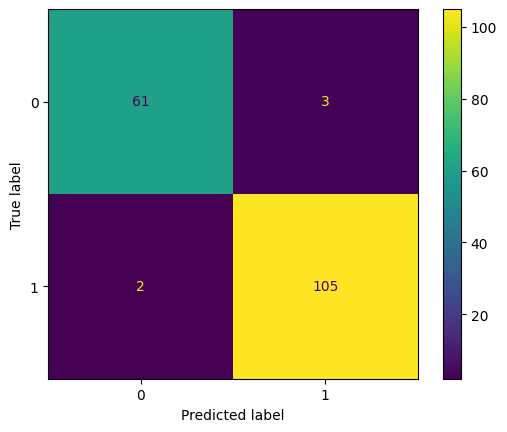

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96        64
           1       0.97      0.98      0.98       107

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [ ]:
print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, X_test_prediction)}\n")
cm = confusion_matrix(Y_test, X_test_prediction, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.show()
print(f"Classification Report :- \n {classification_report(Y_test, X_test_prediction)}")

Building the prediction

In [ ]:
input_data = (9.504,12.44,60.34,273.9,0.1024,0.06492,0.02956,0.02076,0.1815,0.06905,0.2773,0.9768,1.909,15.7,0.009606,0.01432,0.01985,0.01421,0.02027,0.002968,10.23,15.66,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.245,0.07773)


#changing the input data as numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array data as we are predicting for only one instances
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
  print('The Breast cancer is Malignant')
else:
  print('The Breast cancer is Benign')

[1]
The Breast cancer is Benign


Saved the training model

In [ ]:
import pickle
filename = 'breast_cancer_model.sav'
pickle.dump(model, open(filename,'wb'))

In [ ]:
#loading the saved model
breast_cancer_model = pickle.load(open('breast_cancer_model.sav','rb'))

In [ ]:
input_data = (13.28,20.28,87.32,545.2,0.1041,0.1436,0.09847,0.06158,0.1974,0.06782,0.3704,0.8249,2.427,31.33,0.005072,0.02147,0.02185,0.00956,0.01719,0.003317,17.38,28,113.1,907.2,0.153,0.3724,0.3664,0.1492,0.3739,0.1027)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
  print('The Breast cancer is Malignant')
else:
  print('The Breast cancer is Benign')

[0]
The Breast cancer is Malignant
